## Import Module

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mean_variance_analysis as mva
%load_ext autoreload
%autoreload 2

## Applying Mean Variance Analysis to Portfolios of Different Information Levels

In [3]:
dir = 'Results'

portfolio_values_lst = []
portfolio_performance_lst = []

for file in os.listdir(dir):
    if file.startswith('efficient_stocks'):
        po = mva.PortfolioOptimizer(file, 1000)
        portfolio_values_lst.append(po.portfolio_values)
        portfolio_performance_lst.append(po.portfolio_performance)

portfolio_values_lst.append(po.VNINDEX)
portfolio_performance_lst.append(po.VNINDEX_performance)

all_portfolio_values = pd.concat(portfolio_values_lst, axis=1)
all_portfolio_performance = pd.concat(portfolio_performance_lst, axis=1)

col_order = ['100%', '90%', '80%', '70%', 'VNINDEX']

all_portfolio_performance = all_portfolio_performance[col_order]
all_portfolio_performance.to_csv('Results/portfolios_performance.csv')
all_portfolio_values = all_portfolio_values[col_order]


In [4]:
all_portfolio_performance

,100%,90%,80%,70%,VNINDEX
Information Level,,,,,
Sharpe Ratio,0.65,1.44,1.36,0.86,0.50
Annualized Return,30.71%,43.60%,46.45%,36.45%,11.65%
Annualized Volatility,44.29%,29.14%,32.95%,40.41%,19.85%
Final Portfolio Value,3909.9,6930.4,7864.7,5046.5,1286.4


In [5]:
all_portfolio_values

,100%,90%,80%,70%,VNINDEX
date,,,,,
2020-04-21,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2020-04-22,1061.045553,1048.194417,1048.194417,1061.045553,1002.712430
2020-04-23,1055.639792,1045.328703,1045.328703,1055.639792,1009.219655
2020-04-24,1002.966577,1032.895741,1032.895741,1002.966577,1012.805800
2020-04-27,1053.662074,1056.887131,1056.887131,1053.662074,1005.124928
...,...,...,...,...,...
2024-10-04,3832.252170,6736.895406,7724.959797,4934.162089,1656.929738
2024-10-07,3832.252170,6656.036186,7630.729816,4854.560211,1656.056022
2024-10-08,3830.445357,6845.636464,7874.083695,5086.580412,1658.729331


## Plot Portfolio Values of Different Information Levels

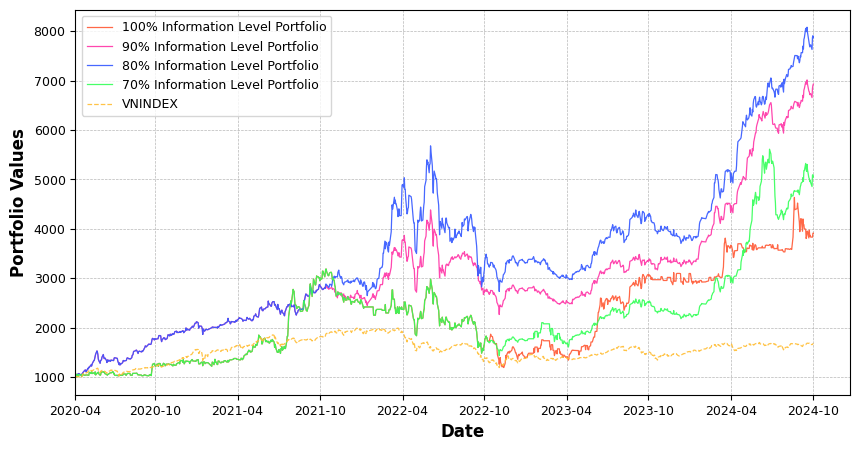

In [6]:
plt.figure(figsize=(10, 5))

colors = ['#FF5733', '#FF33A6', '#3357FF', '#33FF57', '#FFBD33']

for col, c in zip(all_portfolio_values.columns[:-1], colors[:-1]):
    plt.plot(all_portfolio_values.index, all_portfolio_values[col], c=c, lw=0.9, alpha=0.9, label=f"{col} Information Level Portfolio")

plt.plot(all_portfolio_values.index, all_portfolio_values['VNINDEX'], c=colors[-1], ls='--', lw=0.9, alpha=0.9, label='VNINDEX')

plt.xlabel('Date', fontweight='bold', fontsize=12)
plt.ylabel('Portfolio Values', fontweight='bold', fontsize=12)

indices = np.linspace(0, len(all_portfolio_values.index) - 1, 10, dtype=int)
xticks = all_portfolio_values.index[indices]
xtick_labels = [x.strftime('%Y-%m') for x in xticks]
plt.xticks(xticks, labels=xtick_labels, fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(left=all_portfolio_values.index[0])

plt.grid(lw=0.5, ls='--', alpha=0.9)

plt.legend(loc='upper left', fontsize=9)

plt.savefig('Results/portfolio_values.png', format='png', dpi=300)